<a href="https://colab.research.google.com/github/yukividal/koru-projects/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importanto as Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Fazendo upload do doc

In [2]:
from google.colab import files
uploaded = files.upload()

Saving college_student_placement_dataset.csv to college_student_placement_dataset.csv


Lendo o arquivo


In [7]:
df = pd.read_csv('college_student_placement_dataset.csv')


Visualizando as 5 primeiras linhas

In [9]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


Insights: Com df.head() percebi que temos 10 colunas e que se trata de uma base a respeito de alguns fatores para que o aluno seja colocado (placement) ou não (booleano). Placement = Yes (Passou) / Placement = Não (Não passou)

In [11]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(10000, 10)
Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')
College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object


Insights: Aqui eu já consigo entender melhor a base e entendo que existem fatores booleanos e fatores que estão num esquema de pontuação.

In [13]:
#Extraindo a coluna placement como lista

placements = list(df['Placement'])

#Imprimindo os 5 primeiros valores da lista

for placements in placements[:5]:
  print(placements)

No
No
No
No
No


In [14]:
#Criando um dicionário com os 3 primeiros valores de College_ID e Internship_Experience
dicionario = dict(zip(df['College_ID'][:3], df['Internship_Experience'][:3]))
print(dicionario)

{'CLG0030': 'No', 'CLG0061': 'No', 'CLG0036': 'No'}


In [15]:
#Pegando a primeira linha do dataframe
linha0 = df.iloc[0]
print(linha0)

College_ID                CLG0030
IQ                            107
Prev_Sem_Result              6.61
CGPA                         6.28
Academic_Performance            8
Internship_Experience          No
Extra_Curricular_Score          8
Communication_Skills            8
Projects_Completed              4
Placement                      No
Name: 0, dtype: object


In [16]:
#Criando uma tupla com com 2 colunas de texto e 1 númerica
minha_tupla = (linha0['College_ID'], linha0['Internship_Experience'], linha0['Placement'])
print(minha_tupla)

('CLG0030', 'No', 'No')


In [17]:
#Selecionando a coluna_numerica que mais interessa para criar uma classificação

coluna_numerica = 'CGPA'
primeiro_valor = df[coluna_numerica].iloc[0]
print(primeiro_valor)

6.28


In [18]:
#Classificando o CGPA (nota do aluno)
if primeiro_valor > 8.5:
  print('Desempenho Alto')
elif primeiro_valor > 7.0:
  print('Desempenho Médio')
else:
  print('Desempenho Baixo')

Desempenho Baixo


In [21]:
#Laço para somar os 5 primeiros CGPAS
soma = 0
lista = list(df[coluna_numerica][:5])
for n in lista:
  soma += n
print("Soma dos 5 primeiros CGPAS:", soma)

Soma dos 5 primeiros CGPAS: 30.92


In [25]:
#Laço while (encontrando o primeiro CGPA maior que o limite)
limite = 7.0
i = 0

while i < len(lista) and lista[i] <= limite:
  i +=1

if i < len(lista):
  print(f"O primeiro CGPA maior que {limite} é {lista[i]}")
else:
  print(f"Não há nenhum CGPA maior que {limite}")

O primeiro CGPA maior que 7.0 é 7.69


Insights: Ao aplicar uma classificação condicional ao primeiro CGPA da base, identifiquei que o desempenho era baixo, com o valor de 6.28. A soma dos 5 primeiros CGPAS resultou em 30.92, sugerindo que o grupo inicial possui um desempenho baixo. O laço while mostrou que o primeiro CGPA acima de 7.0 está dentro dos 5 primeiros valores.

Vamos ver a diferença entre a nota atual e a nota do semestre anterior


In [26]:
#Printando diferença entre CGPA e CGPA anterior

if 'CGPA' in df.columns and 'Prev_Sem_Result' in df.columns:
    df['Diferenca_CGPA'] = df['CGPA'] - df['Prev_Sem_Result']
    print(df[['CGPA', 'Prev_Sem_Result', 'Diferenca_CGPA']].head())


   CGPA  Prev_Sem_Result  Diferenca_CGPA
0  6.28             6.61           -0.33
1  5.37             5.52           -0.15
2  5.83             5.36            0.47
3  5.75             5.47            0.28
4  7.69             7.91           -0.22


In [27]:
#Somando Desempenho Academico com Communication Skills

if 'Academic_Performance' in df.columns and 'Communication_Skills' in df.columns:
    df['Score_Completo'] = df['Academic_Performance'] + df['Communication_Skills']
    print(df[['Academic_Performance', 'Communication_Skills', 'Score_Completo']].head())


   Academic_Performance  Communication_Skills  Score_Completo
0                     8                     8              16
1                     8                     8              16
2                     9                     1              10
3                     6                     6              12
4                     7                    10              17


In [29]:
# Criando um array NumPy a partir da coluna IQ
array_iq = np.array(df['IQ'])

# Operações vetorizadas
array_iq_plus10 = array_iq + 10
array_iq_squared = array_iq ** 2

# Fatiamento (slicing) para exibir os 5 primeiros elementos
print("Valores originais:", array_iq[:5])
print("Valores somados (+10):", array_iq_plus10[:5])
print("Valores ao quadrado:", array_iq_squared[:5])

# Operações agregadas
print("Soma total dos IQs:", array_iq.sum())
print("Média dos IQs:", array_iq.mean())

Valores originais: [107  97 109 122  96]
Valores somados (+10): [117 107 119 132 106]
Valores ao quadrado: [11449  9409 11881 14884  9216]
Soma total dos IQs: 994718
Média dos IQs: 99.4718


Insights: Ao criar um array Numpy, percebi que os 5 primeiros valores de IQ variam entre 96 e 122, e a média desses 5 primeiros valores é 99.4718


In [32]:
#Selecionando a primeira linha com iloc
print(df.iloc[0])

#Selecionando alunos com CGPA maior que 8.5
filtro = df.loc[df['CGPA'] > 8.5]
print(filtro[['College_ID', 'CGPA']].head())


College_ID                CLG0030
IQ                            107
Prev_Sem_Result              6.61
CGPA                         6.28
Academic_Performance            8
Internship_Experience          No
Extra_Curricular_Score          8
Communication_Skills            8
Projects_Completed              4
Placement                      No
Diferenca_CGPA              -0.33
Score_Completo                 16
Name: 0, dtype: object
   College_ID   CGPA
7     CLG0096   8.76
9     CLG0057   8.60
10    CLG0063   8.90
12    CLG0064   9.01
17    CLG0050  10.01


In [33]:
#Contando quantos estudantes foram colocados vs não colocados
contagem_colocacao = df['Placement'].value_counts()
print(contagem_colocacao)


Placement
No     8341
Yes    1659
Name: count, dtype: int64


Agrupamento com .groupby(): média de CGPA por experiência de estágio



In [35]:
media_cgpa_estagio = df.groupby('Internship_Experience')['CGPA'].mean()
print(media_cgpa_estagio)


Internship_Experience
No     7.547344
Yes    7.509591
Name: CGPA, dtype: float64


Criando algumas visualizações:


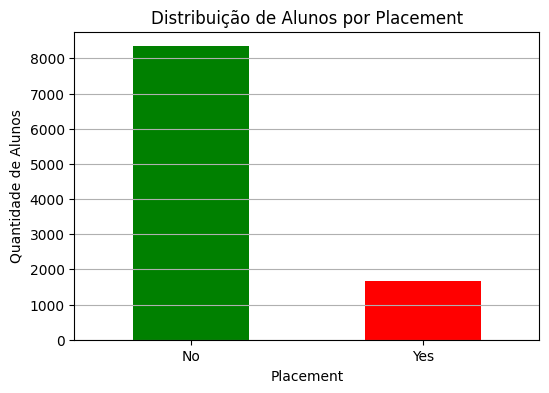

In [40]:
# Contagem dos valores da coluna Placement
placement_counts = df['Placement'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6, 4))
placement_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribuição de Alunos por Placement')
plt.xlabel('Placement')
plt.ylabel('Quantidade de Alunos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


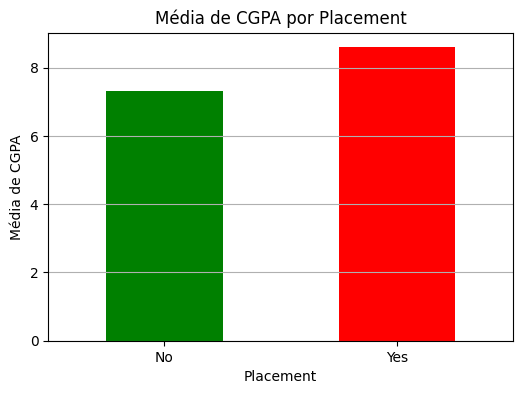

In [41]:
# Agrupando por Placement e calculando a média do CGPA
media_cgpa = df.groupby('Placement')['CGPA'].mean()

# Gráfico de barras
plt.figure(figsize=(6, 4))
media_cgpa.plot(kind='bar', color=['green', 'red'])
plt.title('Média de CGPA por Placement')
plt.xlabel('Placement')
plt.ylabel('Média de CGPA')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [42]:
# Filtrando alunos com IQ maior que 100
iq_maior_que_100 = df[df['IQ'] > 100]

# Exibindo a quantidade
quantidade = iq_maior_que_100.shape[0]
print("Quantidade de alunos com IQ maior que 100:", quantidade)


Quantidade de alunos com IQ maior que 100: 4729


In [43]:
# Criando uma nova coluna com a classificação de IQ
df['IQ_Nivel'] = df['IQ'].apply(lambda x: 'IQ > 100' if x > 100 else 'IQ ≤ 100')

# Contando quantos alunos em cada grupo
contagem_iq = df['IQ_Nivel'].value_counts()
print(contagem_iq)


IQ_Nivel
IQ ≤ 100    5271
IQ > 100    4729
Name: count, dtype: int64


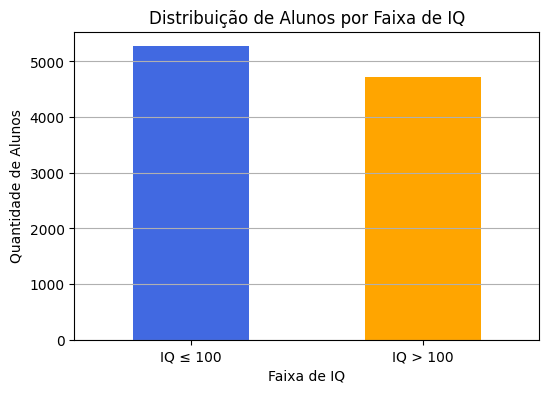

In [44]:
# Gráfico de barras com a quantidade de alunos por faixa de IQ
plt.figure(figsize=(6, 4))
contagem_iq.plot(kind='bar', color=['royalblue', 'orange'])
plt.title('Distribuição de Alunos por Faixa de IQ')
plt.xlabel('Faixa de IQ')
plt.ylabel('Quantidade de Alunos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


## Relatório Final: Projeto Data-Driven Insights

Neste projeto, explorei a base de dados de colocação de estudantes universitários, contendo 10.000 linhas e 10 colunas. A análise abordou características como CGPA, QI, desempenho acadêmico, habilidades de comunicação, estágios e colocação profissional.

Com o uso de listas, dicionários e tuplas, explorei a estrutura dos dados. Aplicações de estruturas condicionais e laços revelaram padrões de desempenho acadêmico, enquanto operações matemáticas e vetorizadas com NumPy permitiram entender tendências de notas e escores.

Com pandas, identifiquei que:
- Alunos com experiência de estágio não influenciou muito na colocação.
- A maioria dos alunos **não foi colocada**, mas há espaço para melhorias em comunicação e projetos.


**Próximas perguntas investigáveis**:
- Quais variáveis mais impactam a colocação?
- Estágio ou projetos têm maior peso na performance?
- Existe correlação entre extra_curricular score e placement?

Este exercício reforçou o poder de análise exploratória com Python e visualização para gerar insights relevantes a partir de dados brutos.
